1. [docTR](#docTR)
2. [Tesseract](#Tesseract)

## docTR

```bash
pip install "python-doctr[torch,viz]" # torch torchvision
```

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [20]:
doc = DocumentFile.from_pdf("file.pdf")
print(f"Number of pages: {len(doc)}")

Number of pages: 9


In [37]:
predictor = ocr_predictor(det_arch="db_resnet50", pretrained=True)

In [38]:
predictor

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), interpolation='bilinear', preserve_aspect_ratio=True, symmetric_pad=True)
      (normalize): Normalize(mean=(0.798, 0.785, 0.772), std=(0.264, 0.2749, 0.287))
    )
    (model): DBNet(
      (feat_extractor): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

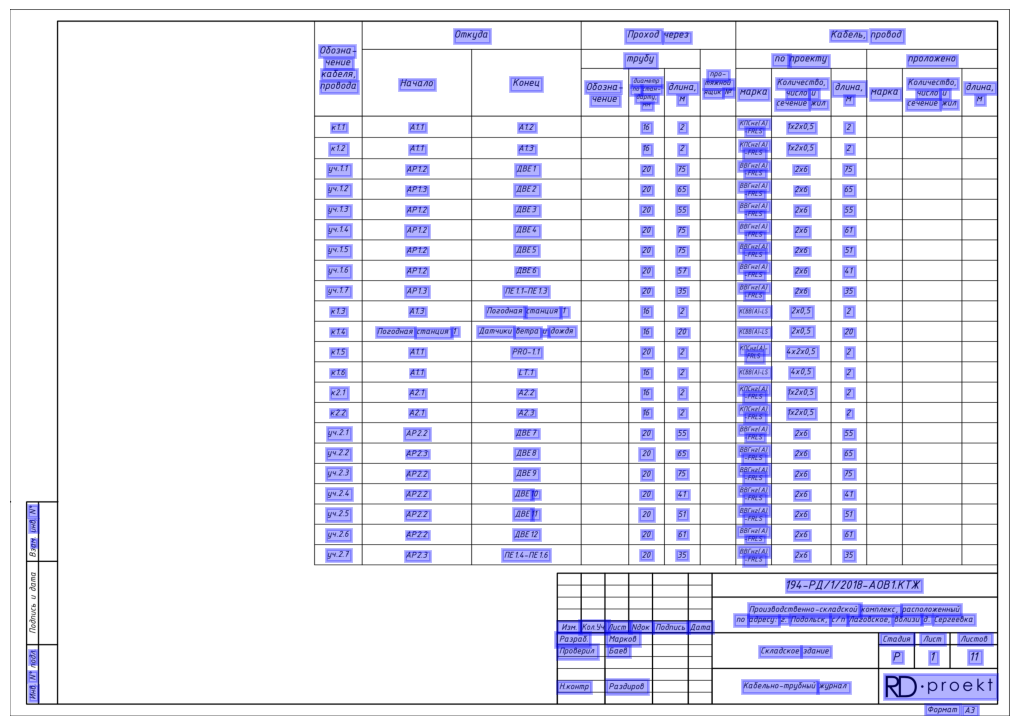

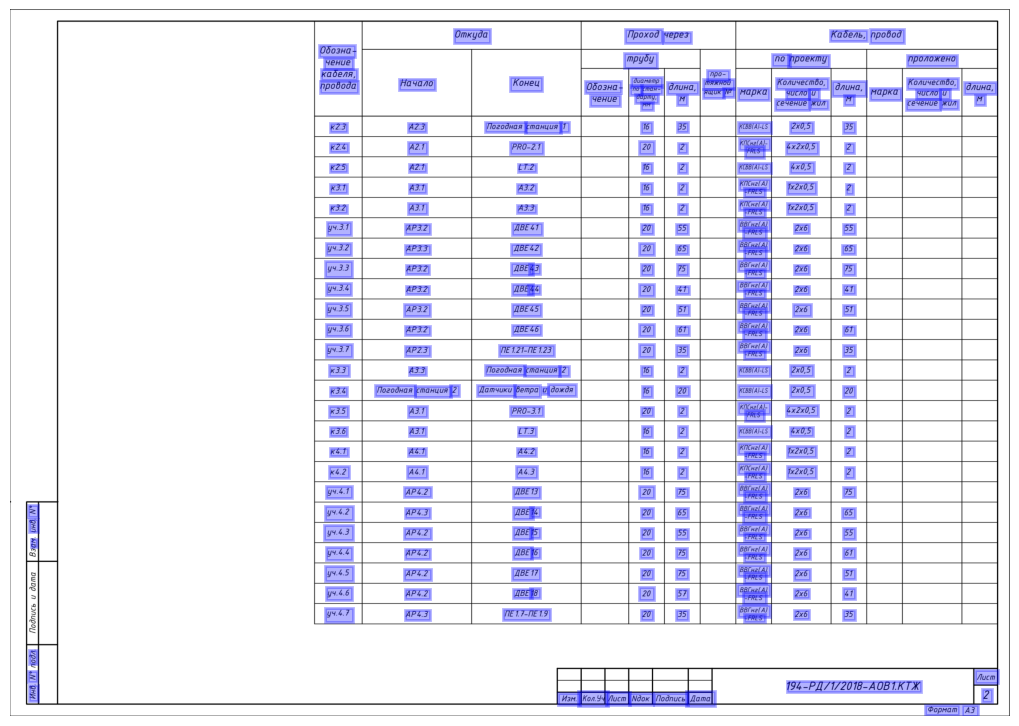

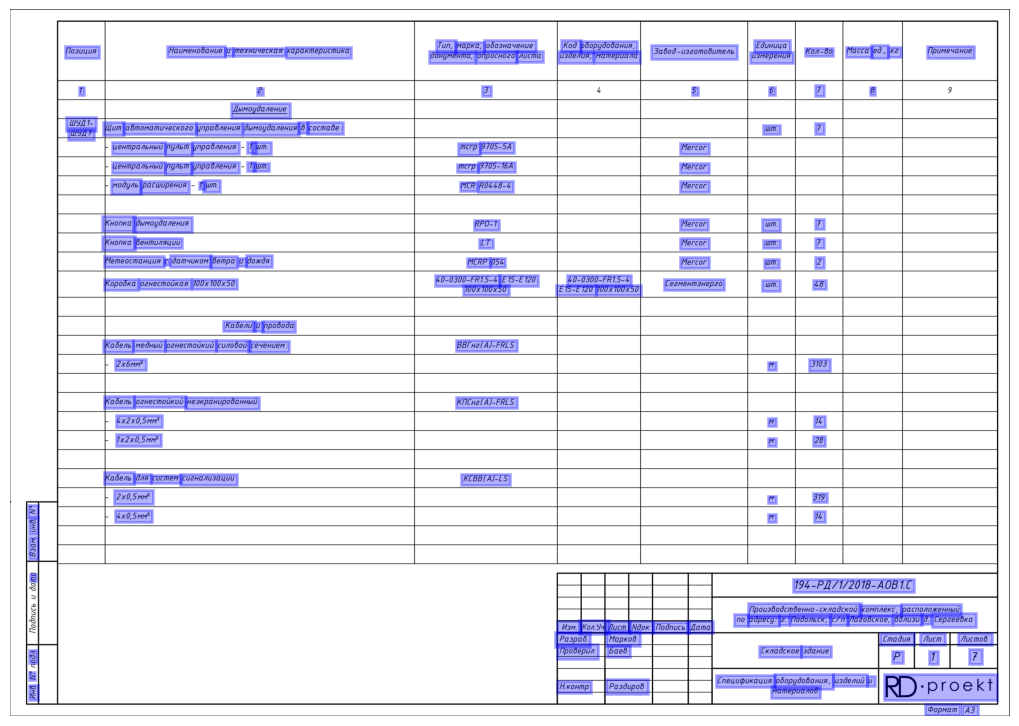

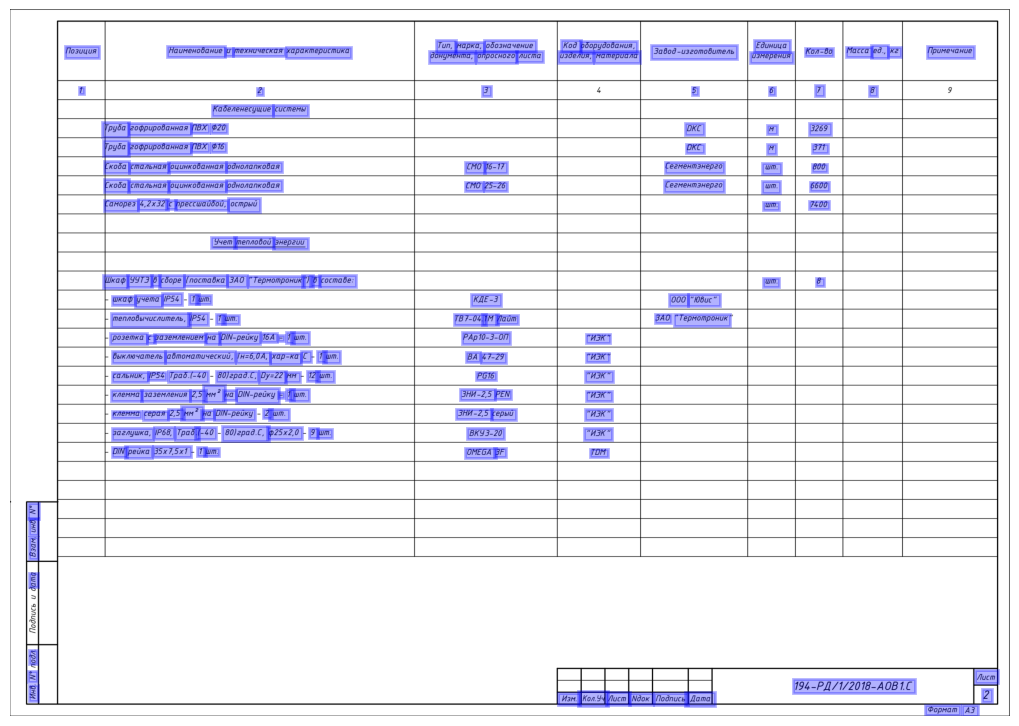

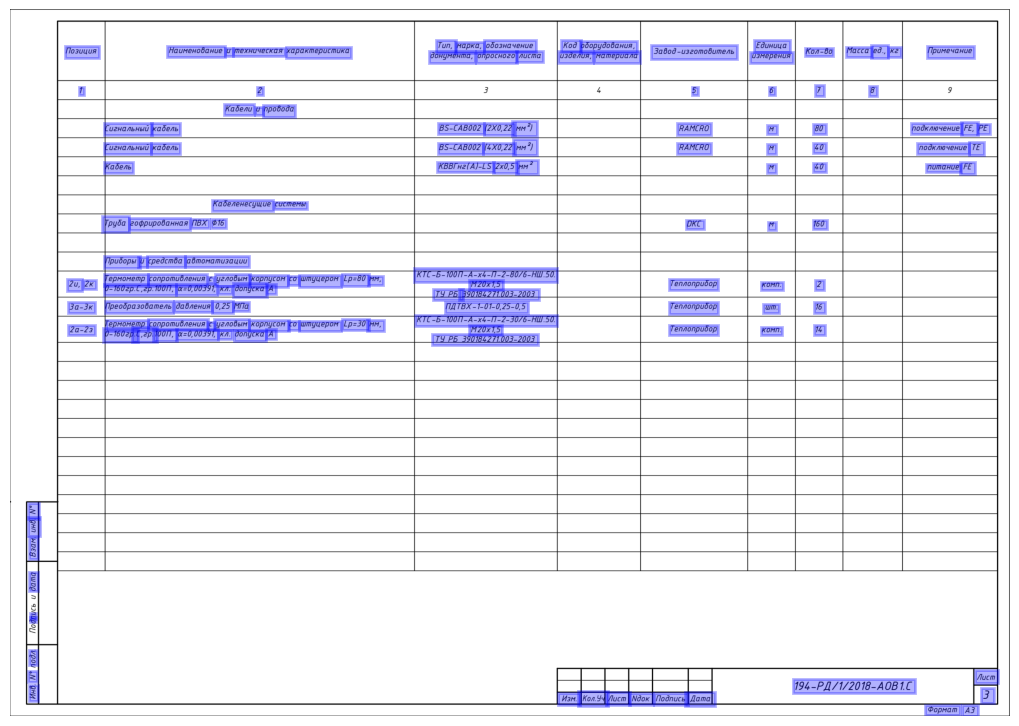

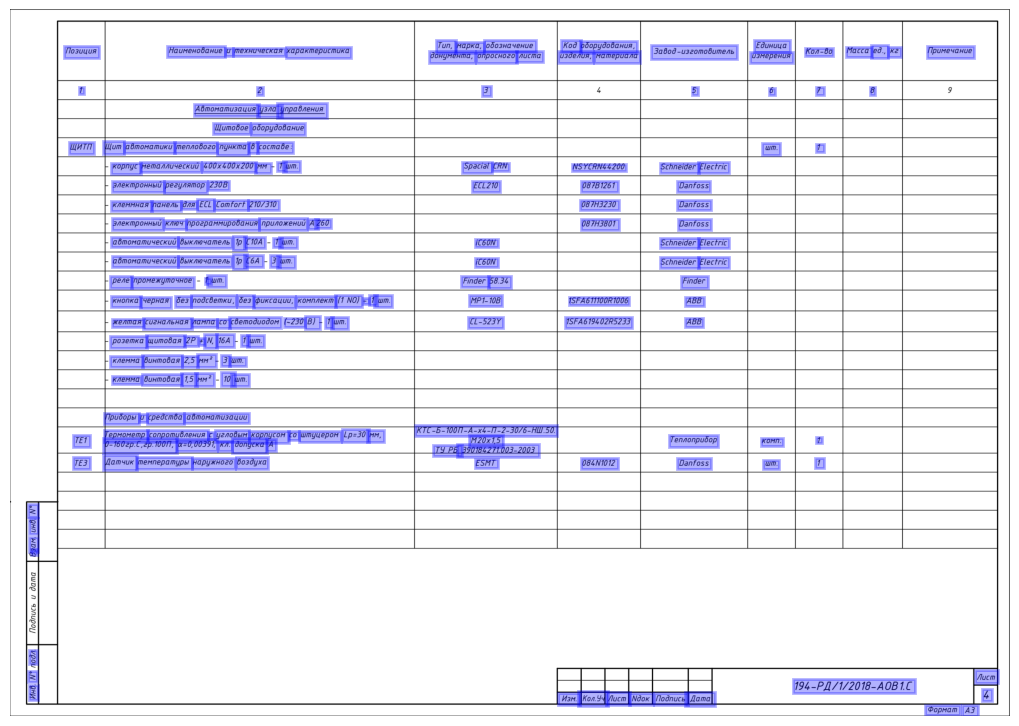

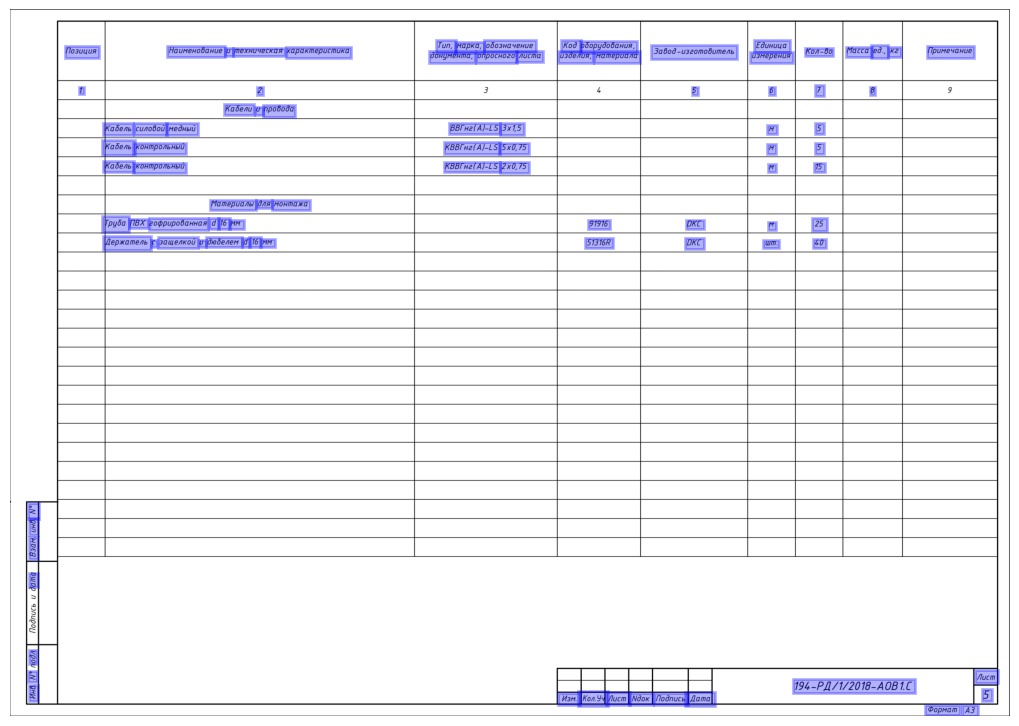

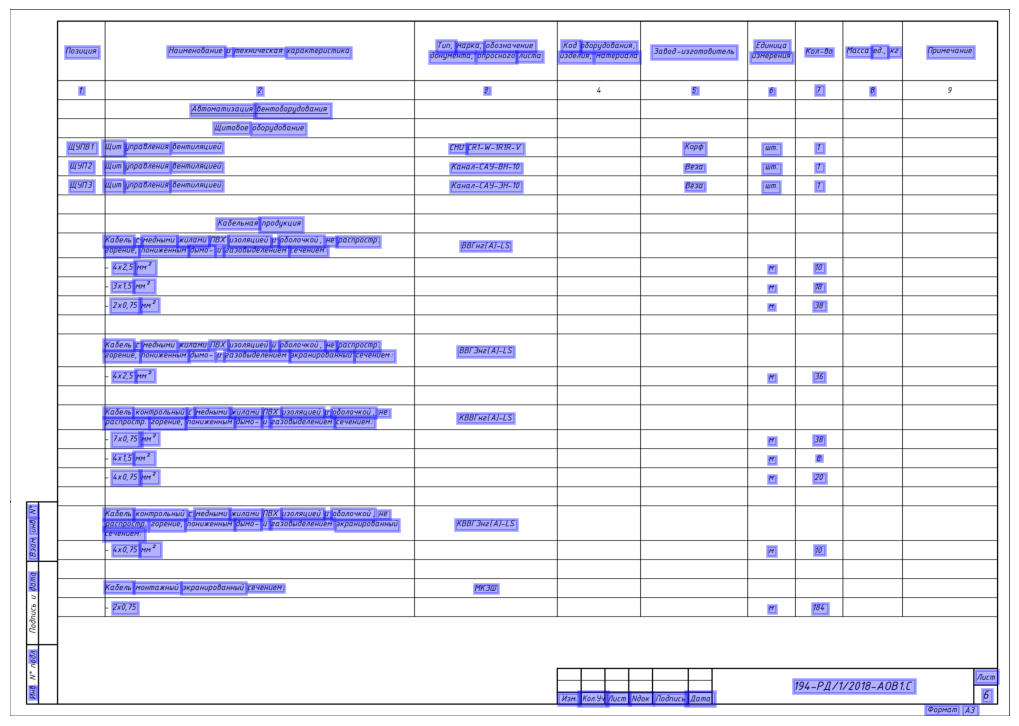

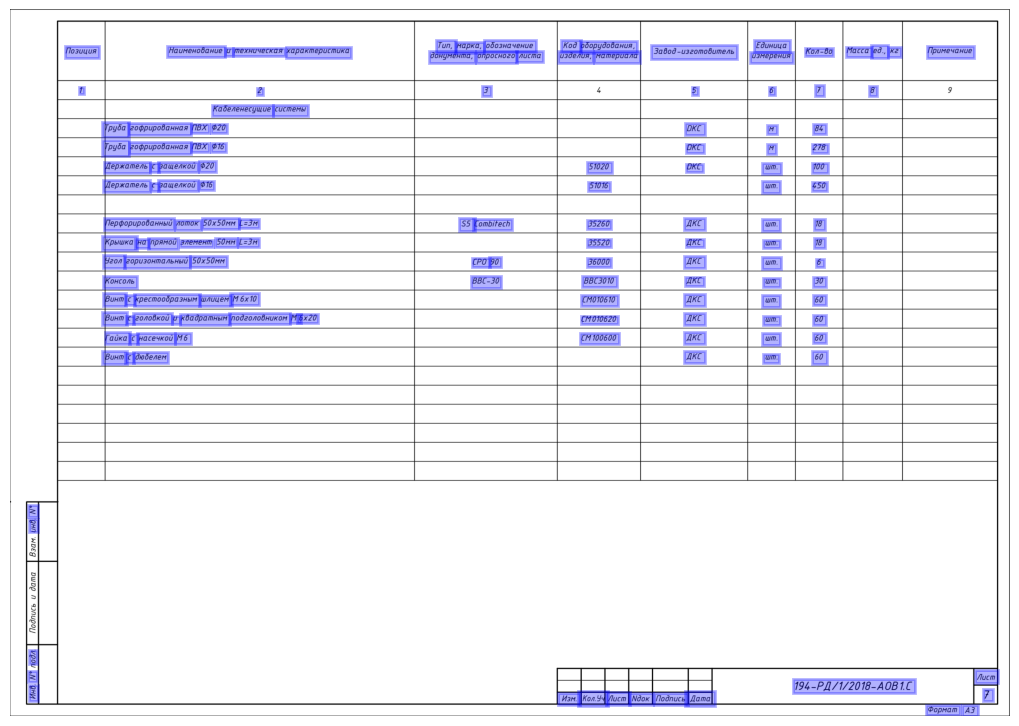

In [39]:
result = predictor(doc)
result.show()

In [ ]:
# json_export = result.export()
# print(json_export)

{'pages': [{'page_idx': 0, 'dimensions': (1684, 2382), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((np.float64(0.015625), np.float64(0.027582671466745867)), (np.float64(0.986328125), np.float64(1.0))), 'objectness_score': 0.7323890972457476, 'lines': [{'geometry': ((np.float64(0.443359375), np.float64(0.027582671466745867)), (np.float64(0.48046875), np.float64(0.049684066953681716))), 'objectness_score': 0.6680806875228882, 'words': [{'value': 'Omkyda', 'confidence': 0.989237904548645, 'geometry': ((np.float64(0.443359375), np.float64(0.027582671466745867)), (np.float64(0.48046875), np.float64(0.049684066953681716))), 'objectness_score': 0.6680806875228882, 'crop_orientation': {'value': 0, 'confidence': None}}]}, {'geometry': ((np.float64(0.615234375), np.float64(0.027582671466745867)), (np.float64(0.681640625), np.float64(0.049684066953681716))), 'objectness_score': 0.704492062330246, 'words': [{'value':

In [40]:
string_result = result.render()
print(string_result)

Omkyda
fpoxod yepe3
Kabenb, npoBod
0003Ha-
yeHue
mpyoy
no npoekmy
nponoxeHo
Kabeng,
npo-
npoboda
Hayano
KoHeu
0003Ha- no duamemp cmaH- dnuHa, mAXHOU
KonuyecmBo, dnuHa,
KonuyecmBo, dnuHa,
dapmy,
9WUK No Mapka YUCAO U
Mapka YUCAO U
yeHue MM M
ceyewue XUA M
ceyewue XUA M
K1.1
A1.1
A1.2
16 2
KICH2/A) -FRLS 1x2x0,5 2
K1.2
A1.1
A13
16 2
KACH2/A) -FRLS 1x2x0,5 2
y4.11
AP1.2
ABE1
20 75
BBFH2/A) -FRLS 2x6 75
y4.12
AP13
ABE2
20 65
BBFw2/A) -FRLS 2x6 65
y4.13
AP1.2
ABE3
20 55
BBFH2/A) -FRLS 2x6 55
y4.14
AP1.2
ABE4
20 75
BBFH2/A) -FRLS 2x6 61
y4.15
AP1.2
ABE5
20 75
BBFW2/A) -FRLS 2x6 51
y4.16
AP1.2
ABE6
20 57
BBFw2/A) -FRLS 2x6 41
y4.1.7
AP13
NE1.1-ME13
20 35
BBFw2/A) -FRLS 2x6 35
K1.3
A13
NlozodHa9 cmaH4uR 1
16 2
KCBBIAI-LS 2x0,5 2
K14 No2odHaA cmaH4uR 1 Aamyuku Bempa U doxdg
16 20
KCBBIAI-LS 2x0,5 20
K1.5
A1.1
PRO-1.1
20 2
KICH2/AI- FRLS 4x2x0,5 2
K16
A1.1
LT.1
16 2
KCBBIAI-LS 4x0,5 2
K2.1
A2.1
A2.2
16 2
KICH2/A) -FRLS 1x2x0,5 2
K2.2
A2.1
A2.3
16 2
KICH2/A) -FRLS 1x2x0,5 2
y4.2.1
AP2.2
ABE7
20 5

In [33]:
from doctr.models import recognition_predictor
predictor = recognition_predictor('parseq')
print(predictor.model.cfg['vocab'])

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~°£€¥¢฿àâéèêëîïôùûüçÀÂÉÈÊËÎÏÔÙÛÜÇ


Нет предобученной модели распознавания текста, которая поддерживает русский язык, но по ббоксам хорошо бьет
можно дообучить свою

## Paddle

In [2]:
import fitz  # PyMuPDF
import os

def pdf_to_jpg(pdf_path, output_folder):
    pdf_document = fitz.open(pdf_path)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        pix = page.get_pixmap()
        img_path = os.path.join(output_folder, f"page_{page_num + 1}.jpg")
        pix.save(img_path)

    print(f"Страницы PDF-файла успешно сохранены в папку {output_folder}")

pdf_path = "file.pdf"
output_folder = "test"
pdf_to_jpg(pdf_path, output_folder)


Страницы PDF-файла успешно сохранены в папку test


In [ ]:
# pip install paddlepaddle paddleocr
from paddleocr import PaddleOCR, draw_ocr

ocr = PaddleOCR(lang="ru") # The model file will be downloaded automatically when executed for the first time
img_path ='doc/imgs/korean_1.jpg'
result = ocr.ocr(img_path)
# Recognition and detection can be performed separately through parameter control
# result = ocr.ocr(img_path, det=False)  Only perform recognition
# result = ocr.ocr(img_path, rec=False)  Only perform detection
for line in result:
    print(line)

# Visualization
# from PIL import Image
# image = Image.open(img_path).convert('RGB')
# boxes = [line[0] for line in result]
# txts = [line[1][0] for line in result]
# scores = [line[1][1] for line in result]
# im_show = draw_ocr(image, boxes, txts, scores, font_path='/path/to/PaddleOCR/doc/fonts/korean.ttf')
# im_show = Image.fromarray(im_show)
# im_show.save('result.jpg')

## Tesseract